## An Analysis Of Global Wheat Production(1996-2020)

## We begin by importing all the necessary python libraries

In [1]:
import pandas as pd
import pycountry
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## A general overview of the wheat data

In [3]:
df = pd.read_csv(r"/home/user/PycharmProjects/pythonProject/International wheat production statistics.csv")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   42 non-null     object 
 1   2020[1]   42 non-null     float64
 2   2019[1]   42 non-null     object 
 3   2018[1]   42 non-null     object 
 4   2017[1]   42 non-null     object 
 5   2016[1]   42 non-null     object 
 6   2015[2]   42 non-null     object 
 7   2014[3]   42 non-null     object 
 8   2013[4]   42 non-null     object 
 9   2012[5]   42 non-null     object 
 10  2011[5]   42 non-null     object 
 11  2010[5]   42 non-null     float64
 12  2009[5]   42 non-null     float64
 13  2008[5]   42 non-null     float64
 14  2007[5]   42 non-null     float64
 15  2006[5]   42 non-null     float64
 16  2005 [6]  42 non-null     float64
 17  2004[6]   42 non-null     float64
 18  2003[6]   42 non-null     float64
 19  2002      42 non-null     float64
 20  2001      42 non-null     float64


## We need to assign a 3-letter country code to each country using the pycountry library


Begin by creating a reusable function for ease of workflow.

In [4]:
def country_code(column):
    code = list()
    for country in column:
        try:
            countrycode = pycountry.countries.get(name=country).alpha_3
            code.append(countrycode)
        except:
            code.append("None")
    return code

In [5]:
df["iso_a3"] = country_code(df.Country)
print(df.head())

         Country  2020[1] 2019[1] 2018[1] 2017[1] 2016[1] 2015[2] 2014[3]  \
0          China    134.3   133.6   131.4   134.3   131.7   130.2   126.2   
1          India    107.6   103.6    99.7    98.5    93.5    86.5    94.5   
2         Russia     85.9    74.5    72.1    85.9    73.3    61.8    59.7   
3  United States     49.7    52.3    51.3    47.3    62.9    55.8    55.4   
4         Canada     35.2    32.3    31.8      30    30.5    27.6    29.3   

  2013[4] 2012[5]  ... 2004[6]  2003[6]  2002  2001  2000   1999   1998  \
0   121.7   125.6  ...    91.6     86.5  90.3  93.9  99.7  113.9  109.7   
1    93.5    94.9  ...    72.1     65.1  72.8  69.7  76.4   70.8   65.9   
2    52.1    37.7  ...    45.4     34.1  50.6  47.0  34.5   31.0   27.0   
3      60    61.8  ...    58.7     63.8  44.1  53.3  60.8   62.7   69.4   
4    37.5      27  ...    25.9     23.6  16.2  20.6  26.8   26.9   24.1   

    1997   1996  iso_a3  
0  123.3  110.6     CHN  
1   69.4   62.6     IND  
2   44.3

We can see that the library does not give Russia a country code and therefore, it will be missing from our analysis.

However, we can see that Russia is the world's 3rd largest wheat producer.

## Create a GeoDataframe(A DataFrame with one or more columns containing geometry for plotting on the world map)



In [6]:
df_geo = gpd.GeoDataFrame(df)
print(df_geo.head(3))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print(world)
merge = pd.merge(world, df, on="iso_a3")
print(merge.head())

  Country  2020[1] 2019[1] 2018[1] 2017[1] 2016[1] 2015[2] 2014[3] 2013[4]  \
0   China    134.3   133.6   131.4   134.3   131.7   130.2   126.2   121.7   
1   India    107.6   103.6    99.7    98.5    93.5    86.5    94.5    93.5   
2  Russia     85.9    74.5    72.1    85.9    73.3    61.8    59.7    52.1   

  2012[5]  ... 2004[6]  2003[6]  2002  2001  2000   1999   1998   1997   1996  \
0   125.6  ...    91.6     86.5  90.3  93.9  99.7  113.9  109.7  123.3  110.6   
1    94.9  ...    72.1     65.1  72.8  69.7  76.4   70.8   65.9   69.4   62.6   
2    37.7  ...    45.4     34.1  50.6  47.0  34.5   31.0   27.0   44.3   34.9   

   iso_a3  
0     CHN  
1     IND  
2    None  

[3 rows x 27 columns]
         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. 

## Barplot for the year 1996


Text(0.5, 1.0, 'wheat yield by country in 1996')

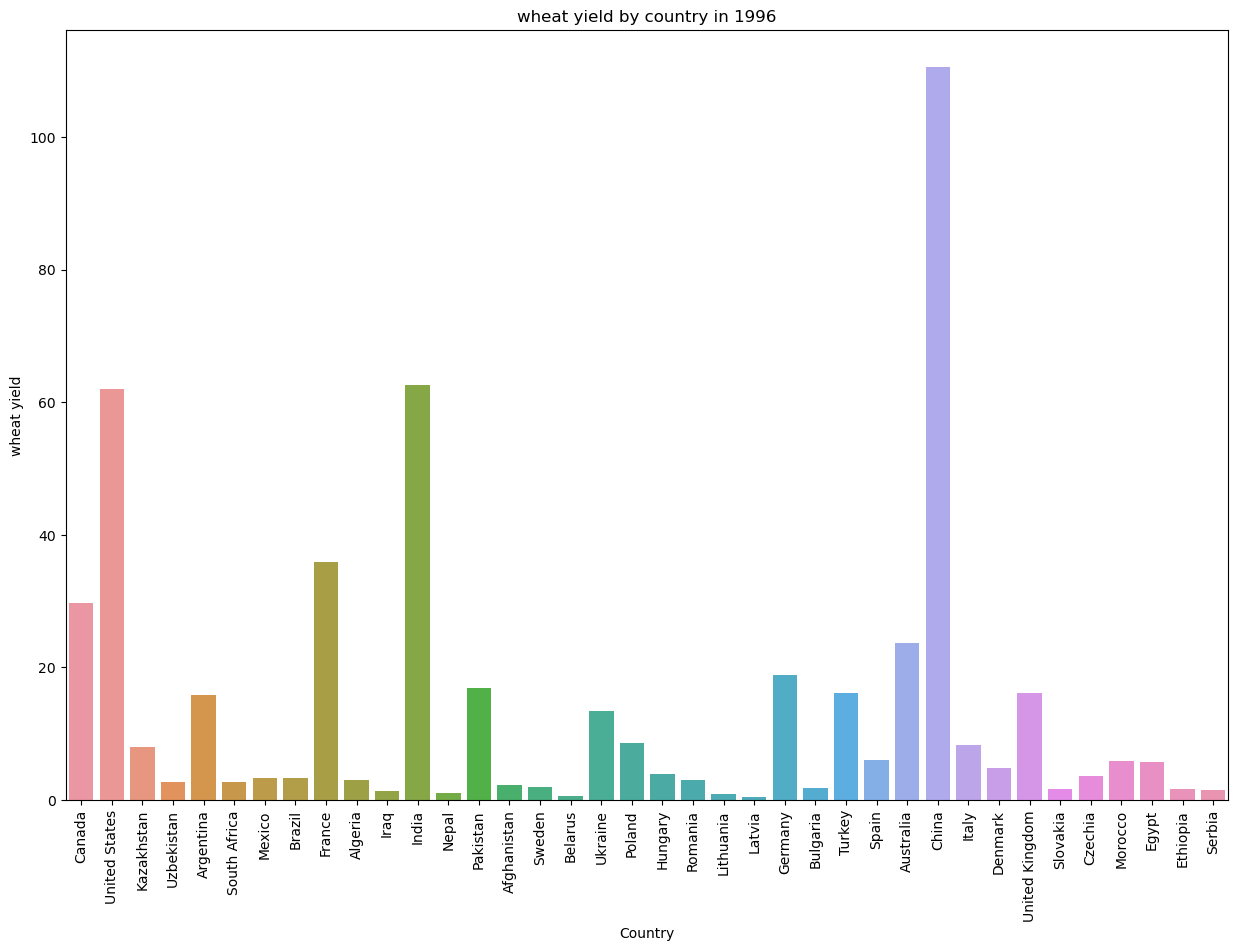

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.barplot(data=merge, x="Country", y="1996", ax=ax)
ax.tick_params(axis="x", labelrotation=90)
ax.set_ylabel("wheat yield")
ax.set_title("wheat yield by country in 1996")

In the year 1996, China was the world's largest producer of wheat.

## World map wheat yield 1996, on a heatmap


<AxesSubplot:>

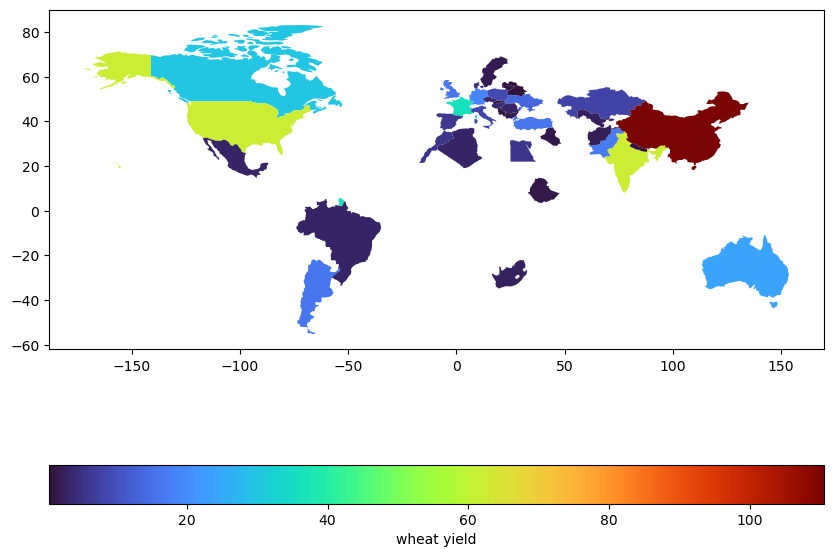

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
merge.plot(column=merge["1996"], ax=ax, legend=True, cmap="turbo",
           legend_kwds={"label": "wheat yield", "orientation": "horizontal"},
           vmin=merge["1996"].min(), vmax=merge["1996"].max())

## Barplot for the year 2020


Text(0.5, 1.0, 'wheat yield by country in 2020')

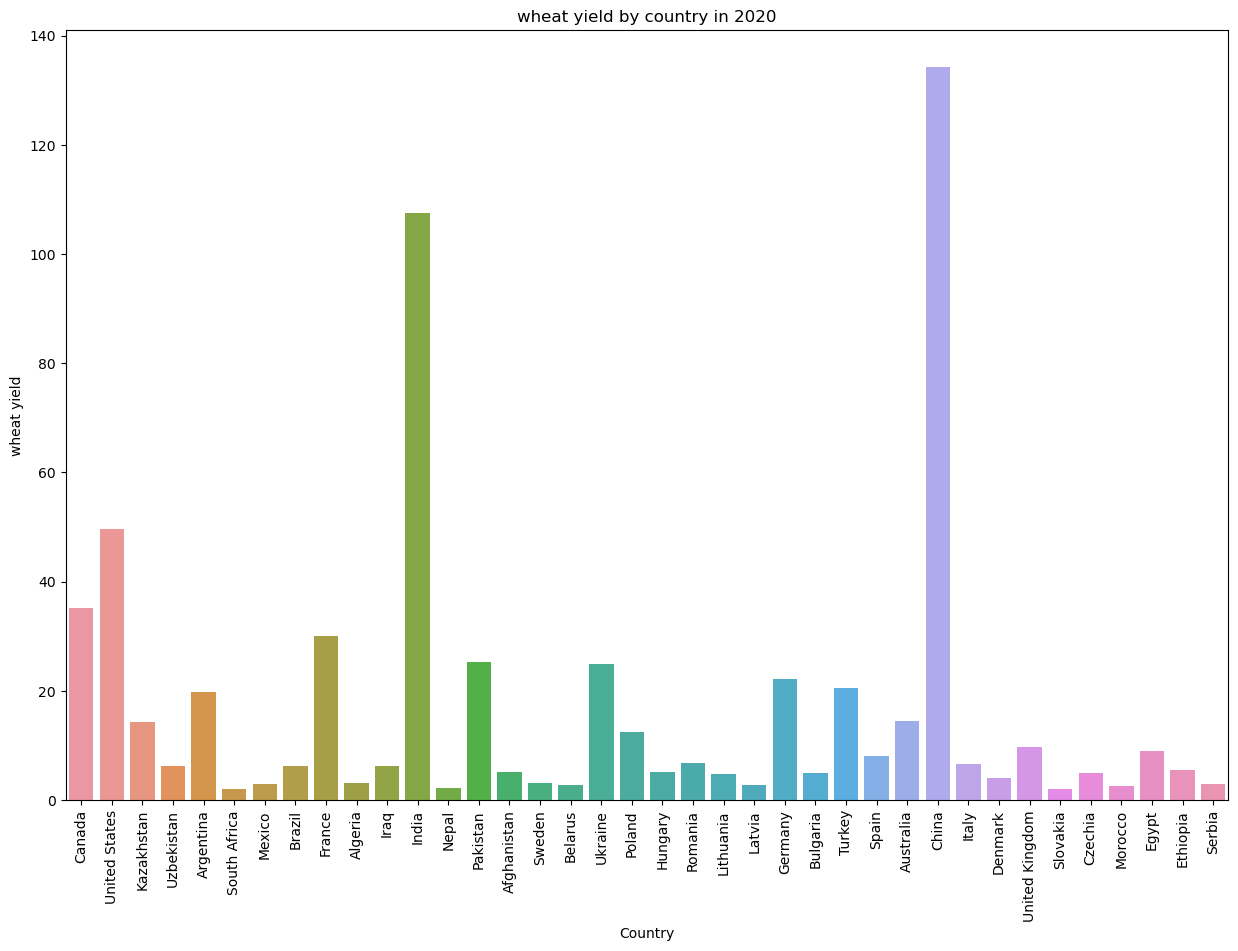

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=merge, x="Country", y="2020[1]", ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("wheat yield")
ax.set_title("wheat yield by country in 2020")

China still takes the lead as the globe's chief wheat producer in the year 2020.

## World map wheat yield 2020, on a heat map


<AxesSubplot:>

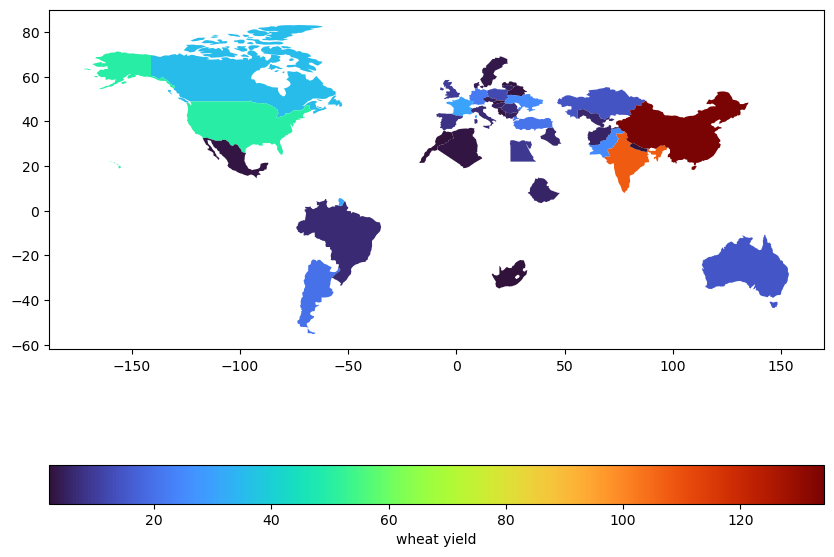

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merge.plot(column=merge["2020[1]"], ax=ax, legend=True, cmap='turbo',
           legend_kwds={'label': "wheat yield", 'orientation': "horizontal"},
           vmin=merge["2020[1]"].min(), vmax=merge["2020[1]"].max())